# EDA Notebook: CPI & PPI Forecast Inflation

## Introduction

In this notebook, we will explore inflation patterns in the Historical Consumer Price Index (CPI) and Historical Producer Price Index (PPI) forecast series.

Both datasets contain annual percent-change forecasts from 1974–2024 for multiple food-related categories.

Specifically, we will examine:

* Inflation trends over time via line plots

* Cross-category comparisons using bar charts

* The top 5 fastest-inflating categories

* The most volatile categories, measured by standard deviation

These results will later be summarized in the main narrative notebook.

## Imports and Load Data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True

# Load preprocessed data
cpi = pd.read_csv("../data/processed/processed_cpi.csv")
ppi = pd.read_csv("../data/processed/processed_ppi.csv")

cpi.head(), ppi.head()


(   Year  All_food  Beef_and_veal  Cereals_and_bakery_products  Dairy_products  \
 0  1974      14.3            2.9                         29.9            18.6   
 1  1975       8.5            1.0                         11.3             3.1   
 2  1976       3.0           -3.2                         -2.2             8.1   
 3  1977       6.3           -0.7                          1.6             2.7   
 4  1978       9.9           22.9                          9.0             6.8   
 
    Eggs  Fats_and_oils  Fish_and_seafood  Food_at_home  Food_away_from_home  \
 0   0.4           41.9              15.3          14.9                 12.7   
 1  -1.8           10.7               8.5           8.2                  9.4   
 2   9.2          -12.5              11.7           2.1                  6.8   
 3  -3.2           10.1              10.8           5.9                  7.6   
 4  -5.4            9.6               9.4          10.5                  9.1   
 
    ...  Fruits_and_vege

### Tidy Long Formatting

In [8]:
cpi_long = cpi.melt(id_vars="Year", var_name="category", value_name="pct_change")
cpi_long.head()


,Year,category,pct_change
0,1974,All_food,14.3
1,1975,All_food,8.5
2,1976,All_food,3.0
3,1977,All_food,6.3
4,1978,All_food,9.9


In [9]:
ppi_long = ppi.melt(id_vars="Year", var_name="category", value_name="pct_change")
ppi_long.head()


,Year,category,pct_change
0,1974,Farm_level_cattle,-10.2
1,1975,Farm_level_cattle,-1.7
2,1976,Farm_level_cattle,-7.1
3,1977,Farm_level_cattle,2.3
4,1978,Farm_level_cattle,32.4


## Line plots of inflation over time

Line plots can show how forecast inflation changes year-to-year for each category.

By plotting all categories in each dataset, we will be able to visually inspect:

- Long-run trends in food price forecasts  
- Periods of high inflation (e.g., 1970s, post-2020)  
- How different categories move together or diverge  

We first start with CPI, then repeat for PPI.


### CPI Line Plot:

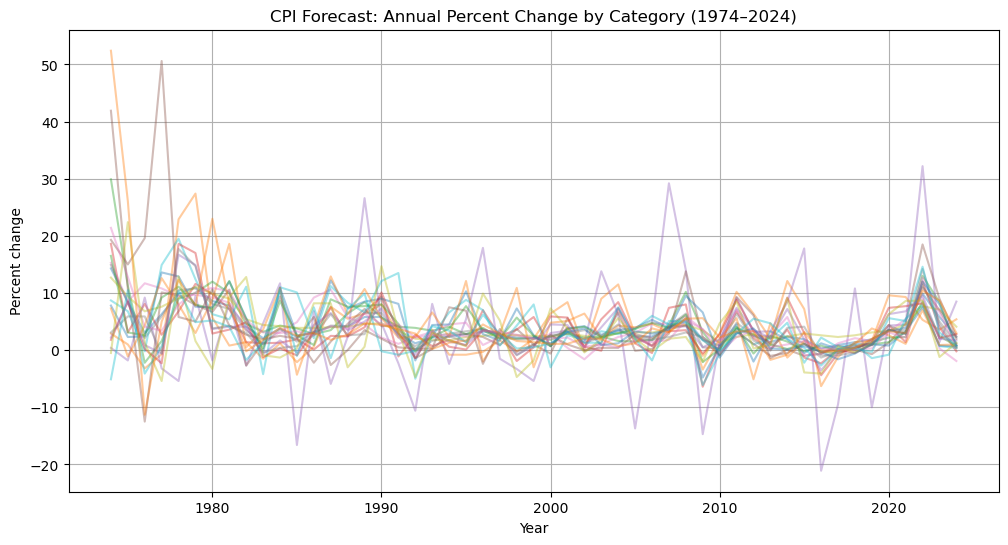

In [12]:
fig, ax = plt.subplots()

for cat, df_cat in cpi_long.groupby("category"):
    ax.plot(df_cat["Year"], df_cat["pct_change"], alpha=0.4)

ax.set_title("CPI Forecast: Annual Percent Change by Category (1974–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Percent change")
plt.show()


### PPI Line Plot:

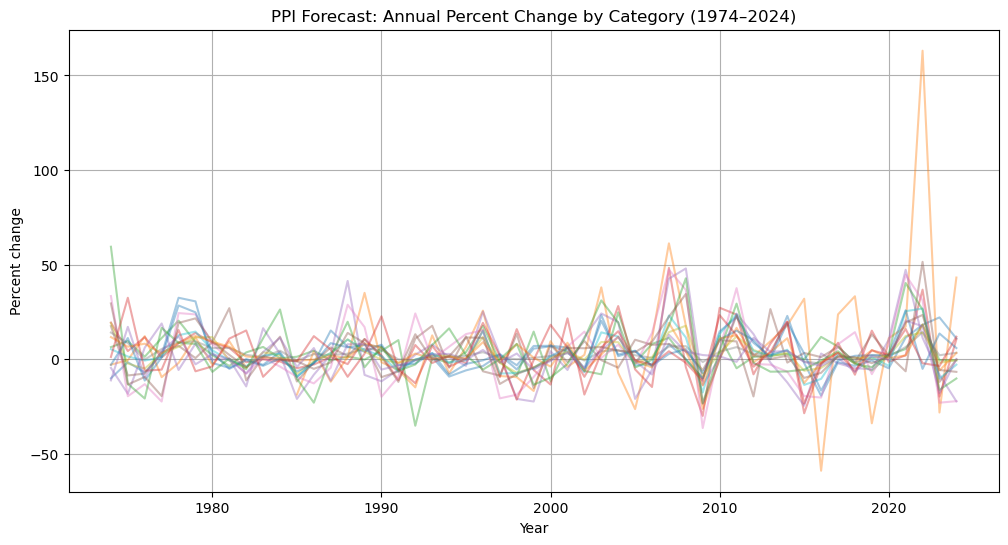

In [13]:
fig, ax = plt.subplots()

for cat, df_cat in ppi_long.groupby("category"):
    ax.plot(df_cat["Year"], df_cat["pct_change"], alpha=0.4)

ax.set_title("PPI Forecast: Annual Percent Change by Category (1974–2024)")
ax.set_xlabel("Year")
ax.set_ylabel("Percent change")
plt.show()


## Bar charts comparing categories

To compare categories more directly, we will now collapse the time dimension and compute the average annual percent change for each category.

This will give us a single summary number for each category, which we visualize with bar charts. Higher means indicate categories that, on average, are forecasted to inflate more quickly.


### 1. Compute mean inflation per category

In [14]:
cpi_mean = (
    cpi_long
    .groupby("category")["pct_change"]
    .mean()
    .sort_values(ascending=False)
)

ppi_mean = (
    ppi_long
    .groupby("category")["pct_change"]
    .mean()
    .sort_values(ascending=False)
)

cpi_mean, ppi_mean


(category
 Sugar_and_sweets                   4.588235
 Fresh_fruits                       4.576471
 Cereals_and_bakery_products        4.321569
 Food_away_from_home                4.278431
 Fresh_fruits_and_vegetables        4.268627
 Fish_and_seafood                   4.250980
 Nonalcoholic_beverages             4.239216
 Beef_and_veal                      4.078431
 Fruits_and_vegetables              4.076471
 Fresh_vegetables                   4.072549
 Fats_and_oils                      4.060784
 All_food                           3.882353
 Other_foods                        3.864706
 Food_at_home                       3.682353
 Meats                              3.519608
 Meats_poultry_and_fish             3.458824
 Dairy_products                     3.390196
 Other_meats                        3.270588
 Eggs                               3.225490
 Pork                               3.009804
 Poultry                            2.849020
 Processed_fruits_and_vegetables    2.723077


### 2. Bar charts of all categories

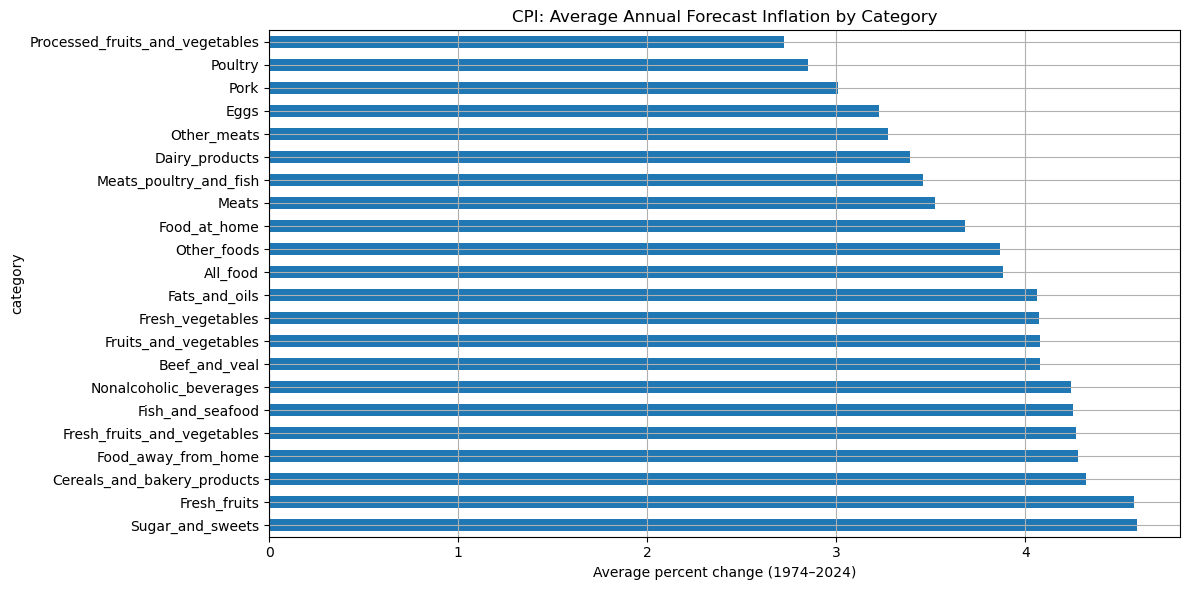

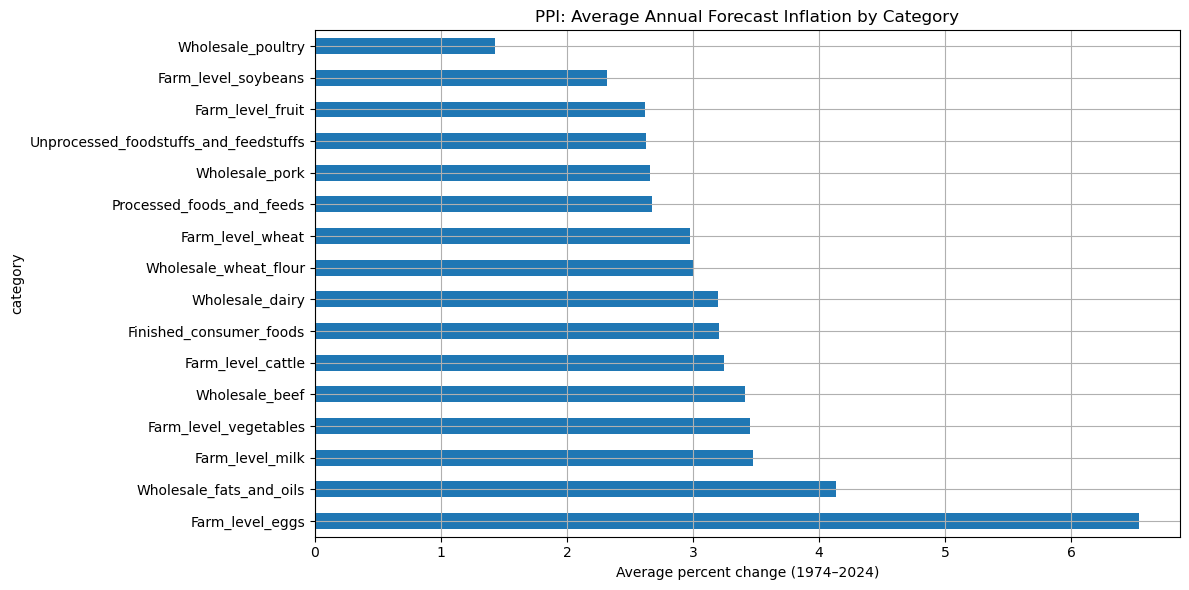

In [15]:
# CPI:
cpi_mean.plot(kind="barh")
plt.title("CPI: Average Annual Forecast Inflation by Category")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()

# PPI:
ppi_mean.plot(kind="barh")
plt.title("PPI: Average Annual Forecast Inflation by Category")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()


## Top 5 fastest-inflating categories

Next, we explicitly rank categories by their average annual forecast inflation and highlight the top 5 for each dataset.

These categories represent the food items with the most persistent upward
price pressure in the forecast data.


### Extract top 5

In [16]:
cpi_top5 = cpi_mean.head(5)
ppi_top5 = ppi_mean.head(5)

cpi_top5, ppi_top5


(category
 Sugar_and_sweets               4.588235
 Fresh_fruits                   4.576471
 Cereals_and_bakery_products    4.321569
 Food_away_from_home            4.278431
 Fresh_fruits_and_vegetables    4.268627
 Name: pct_change, dtype: float64,
 category
 Farm_level_eggs            6.534694
 Wholesale_fats_and_oils    4.131373
 Farm_level_milk            3.476471
 Farm_level_vegetables      3.450980
 Wholesale_beef             3.409804
 Name: pct_change, dtype: float64)

### Plot top 5 (CPI & PPI)

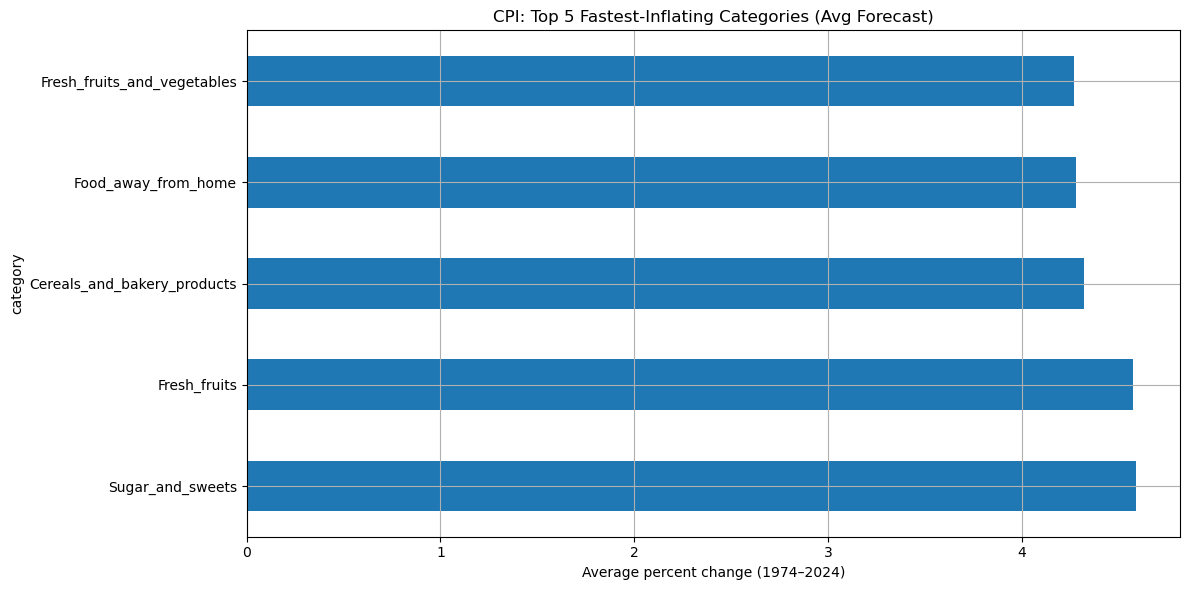

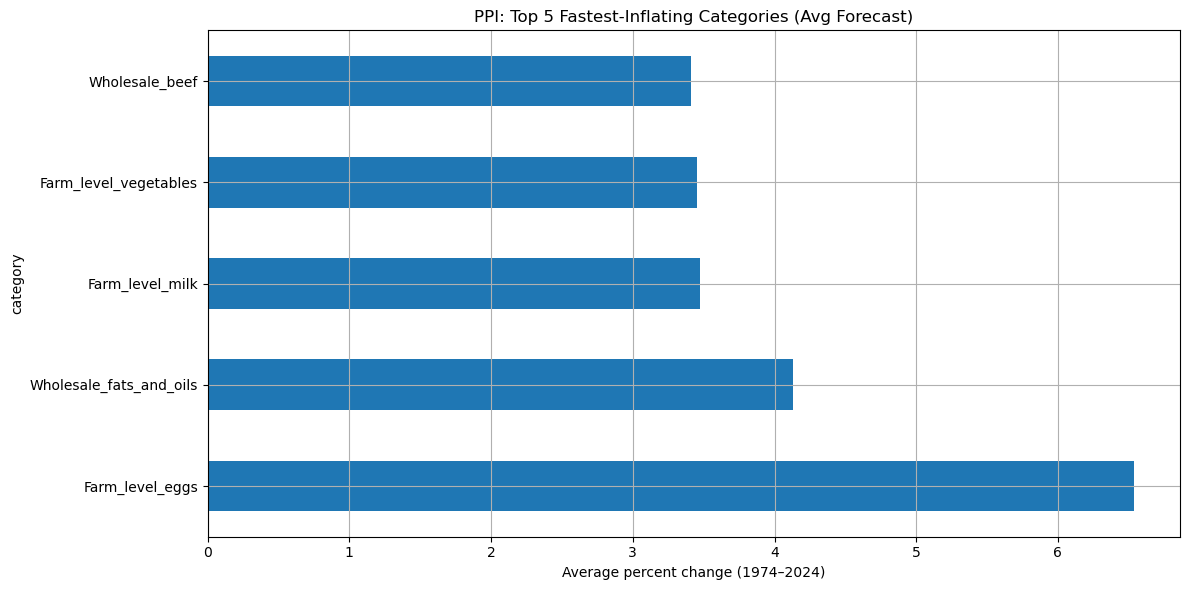

In [18]:
# CPI: 
cpi_top5.plot(kind="barh")
plt.title("CPI: Top 5 Fastest-Inflating Categories (Avg Forecast)")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()

# PPI:
ppi_top5.plot(kind="barh")
plt.title("PPI: Top 5 Fastest-Inflating Categories (Avg Forecast)")
plt.xlabel("Average percent change (1974–2024)")
plt.tight_layout()
plt.show()


## Most volatile categories (year-to-year)

To measure how unstable inflation forecasts are, we will look at the standard deviation of the annual percent change for each category:

A higher standard deviation means the category's inflation forecast fluctuates more from year to year (higher volatility).


### Compute volatility per category

In [23]:
cpi_vol = (
    cpi_long
    .groupby("category")["pct_change"]
    .std()
    .sort_values(ascending=False)
)

ppi_vol = (
    ppi_long
    .groupby("category")["pct_change"]
    .std()
    .sort_values(ascending=False)
)

cpi_vol, ppi_vol


(category
 Eggs                               10.696875
 Sugar_and_sweets                    8.731842
 Nonalcoholic_beverages              8.114507
 Fats_and_oils                       7.371705
 Beef_and_veal                       5.891666
 Pork                                5.629574
 Fresh_fruits                        5.314719
 Cereals_and_bakery_products         5.037909
 Fresh_vegetables                    4.717079
 Meats                               4.407041
 Dairy_products                      4.298477
 Fresh_fruits_and_vegetables         4.078014
 Other_foods                         4.033501
 Poultry                             4.014343
 Other_meats                         3.773502
 Fish_and_seafood                    3.756827
 Fruits_and_vegetables               3.730769
 Meats_poultry_and_fish              3.722804
 Processed_fruits_and_vegetables     3.258995
 Food_at_home                        3.232504
 All_food                            2.886500
 Food_away_from_home    

### Plot most volatile categories (top 5)

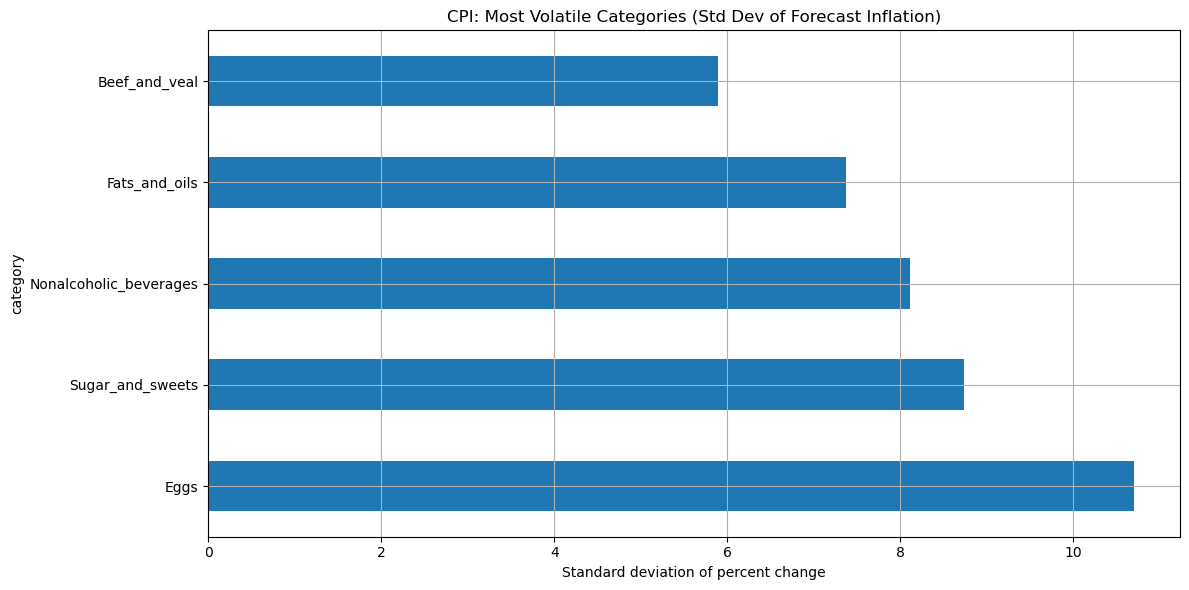

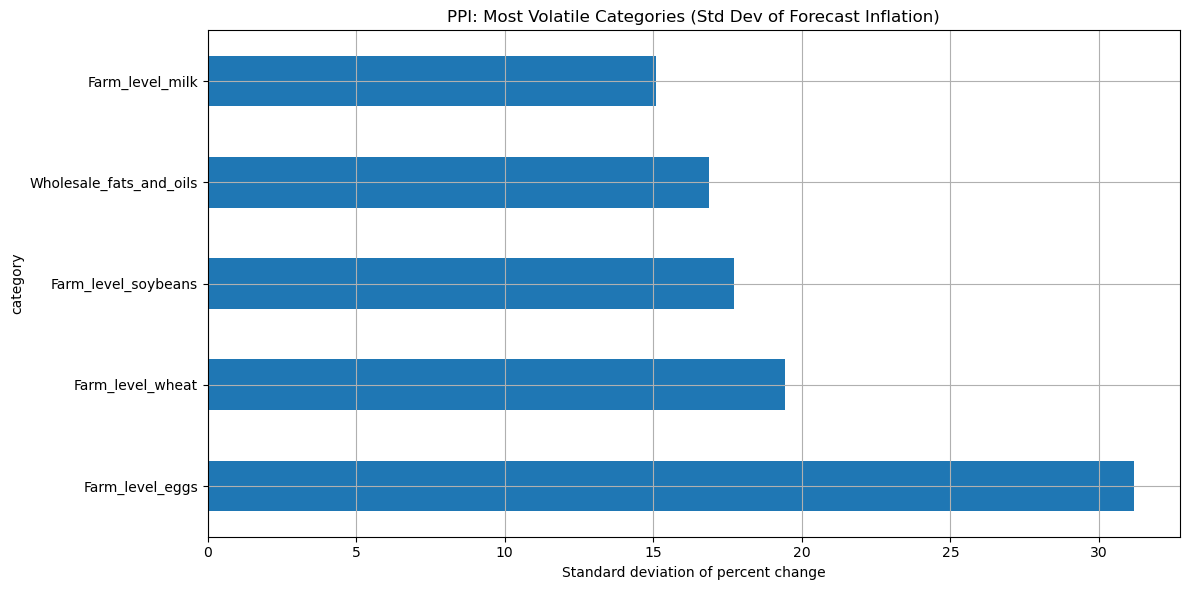

In [24]:
# CPI: 
cpi_vol.head(5).plot(kind="barh")
plt.title("CPI: Most Volatile Categories (Std Dev of Forecast Inflation)")
plt.xlabel("Standard deviation of percent change")
plt.tight_layout()
plt.show()

# PPI: 
ppi_vol.head(5).plot(kind="barh")
plt.title("PPI: Most Volatile Categories (Std Dev of Forecast Inflation)")
plt.xlabel("Standard deviation of percent change")
plt.tight_layout()
plt.show()


# Saving Summary Tables for Later Use

In [26]:
import os
os.makedirs("../data/processed/summary_tables", exist_ok=True)

cpi_mean.to_csv("../data/processed/summary_tables/cpi_mean_inflation.csv")
cpi_vol.to_csv("../data/processed/summary_tables/cpi_volatility.csv")
ppi_mean.to_csv("../data/processed/summary_tables/ppi_mean_inflation.csv")
ppi_vol.to_csv("../data/processed/summary_tables/ppi_volatility.csv")
